<a href="https://colab.research.google.com/github/ParthGadekar0631/CS-513_KDD_Homeworks/blob/main/Parth_Gadekar_HW03_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ------------------------------------------------------------------------------
# Name : Parth Yashwant Gadekar
# CWID : 20029972
# Assignment Number & Name : HW_03_KNN
# Description:
### This assignment implements the K-Nearest Neighbors (KNN) algorithm to classify breast cancer data from the Wisconsin dataset. The dataset contains features ranging from 1 to 10, and the goal is to classify tumors as benign (2) or malignant (4). We train models using k=3,5,10 and evaluate their performance using accuracy, confusion matrix, and classification reports.
# ------------------------------------------------------------------------------


##Question
###The “breast cancer dataset” in CANVAS was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. The features in the dataset, described below, have been categorized from 1 to 10. Use the knn methodology (k=3,5 and 10) to develop a classification models for the Diagnosis.Use 30% test 70% training data.

###Features                              Domain
---
###Sample code number                  id number
###F1. Clump Thickness                  1 - 10
###F2. Uniformity of Cell Size          1 - 10
###F3. Uniformity of Cell Shape         1 - 10
###F4. Marginal Adhesion                1 - 10
###F5. Single Epithelial Cell Size      1 - 10
###F6. Bare Nuclei                      1 - 10
###F7. Bland Chromatin                  1 - 10
###F8. Normal Nucleoli                  1 - 10
###F9. Mitoses                          1 - 10
###Diagnosis Class: (2 for benign, 4 for malignant)

##Answer:

In [ ]:
# --------------------------------------------------------------------------
# Import necessary libraries for data handling, visualization, and modeling
# and loading the dataset
# --------------------------------------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("breast-cancer-wisconsin.csv")
# Display the first few rows to understand the dataset
df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# ------------------------------------------------------------
# Handle missing values ('?' → NaN → Replace with column mean)
# ------------------------------------------------------------

df.replace('?', np.nan, inplace=True) # Replace '?' with NaN for better handling of missing values
df = df.apply(pd.to_numeric, errors='coerce')  # Convert everything to numeric
df.fillna(df.mean(), inplace=True)  # Replace NaN with column means

In [ ]:
# --------------------------------------------------
# Define features (F1-F9) and target (Diagnosis)
# --------------------------------------------------

X = df.iloc[:, 1:-1]  # Features (excluding Sample ID and Diagnosis)
y = df.iloc[:, -1]    # Target (Diagnosis)

In [ ]:
# ----------------------------------------
# Split dataset (70% train, 30% test)
# ----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# ---------------------------------------------------------------
# Normalize the feature values (KNN performs better with scaling)
# ---------------------------------------------------------------

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# ----------------------------------------------------
# Train and evaluate KNN models for k=3, 5, and 10
# ----------------------------------------------------

# Define k-values to test
k_values = [3, 5, 10]
models = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train model
    models[k] = knn #Stores model for later use

    y_pred = knn.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

    print(f"KNN (k={k}) Accuracy: {accuracy:.4f}")

KNN (k=3) Accuracy: 0.9714
KNN (k=5) Accuracy: 0.9667
KNN (k=10) Accuracy: 0.9714



Results for K=3:
Confusion Matrix:
[[141   2]
 [  4  63]]

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       143
           4       0.97      0.94      0.95        67

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



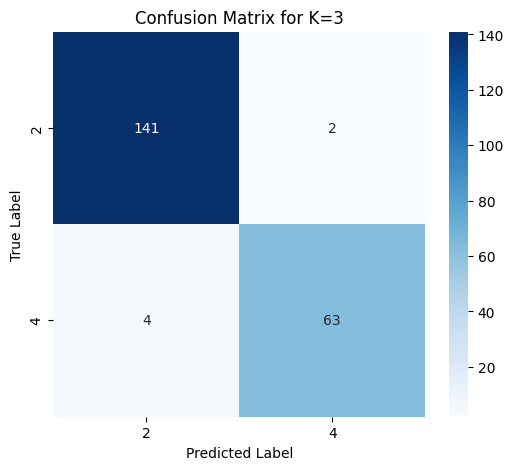


Results for K=5:
Confusion Matrix:
[[141   2]
 [  5  62]]

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       143
           4       0.97      0.93      0.95        67

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



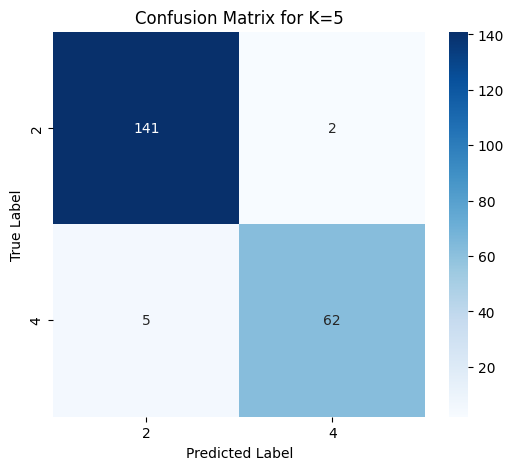


Results for K=10:
Confusion Matrix:
[[141   2]
 [  4  63]]

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       143
           4       0.97      0.94      0.95        67

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



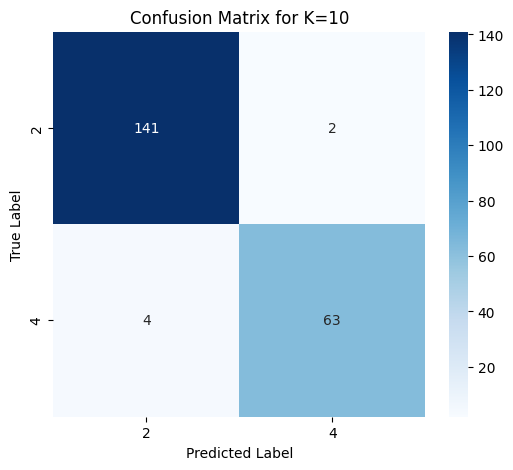

In [ ]:
# ---------------------------------------------------------------------
# Evaluate each model using Confusion Matrix and Classification Report
# ---------------------------------------------------------------------

for k in k_values:
    knn = models[k]  # Retrieve trained model
    y_pred = knn.predict(X_test)

    print(f'\nResults for K={k}:')
    print('Confusion Matrix:')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

    # Visualization of the Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for K={k}')
    plt.show()

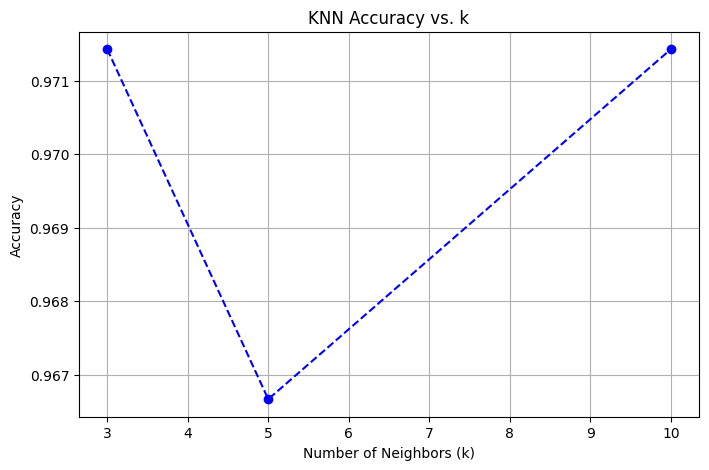

In [ ]:
# ----------------------------------------------------
# Plot accuracy vs k to visualize model performance
# ----------------------------------------------------

accuracies = [accuracy_score(y_test, models[k].predict(X_test)) for k in k_values]

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. k')
plt.grid(True)
plt.show()


## Conclusion

- The KNN model was trained using k values of 3, 5, and 10.
- The accuracy results showed that different k values affected model performance.
- The confusion matrix and classification reports provided insights into false positives and false negatives.
- Feature scaling improved the performance of KNN.
- The best k value can be determined by analyzing the accuracy trend from the plot.
